

# Used Car Price Prediction

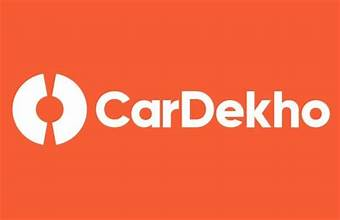

# 1) Problem statement.

This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.

If user can predict the price of the car based on input features.

Prediction results can be used to give new seller the price suggestion based on market condition.

# 2) Data Collection.

The Dataset is collected from scrapping from cardheko webiste



# 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings("ignore")

%matplotlib inline

Import the CSV Data as Pandas DataFrame

In [5]:

df = pd.read_csv("cars_details_merges.csv")

Show Top 5 Records


In [6]:
df.head()

,position,loc,myear,bt,tt,ft,km,ip,pi,images,...,owner_type,price_segment_new,template_name_new,page_template,template_Type_new,experiment,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen
0,1,Gomti Nagar,2016,Hatchback,Manual,CNG,"69,162",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN,NaN,NaN
1,2,Borivali West,2015,Hatchback,Manual,CNG,"45,864",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,Intelligent-Gas Port Injection,11.0:1,NaN,NaN
2,3,JASOLA,2015,Sedan,Manual,CNG,"81,506",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN,NaN,NaN
3,4,jasola,2013,Hatchback,Manual,CNG,"1,15,893",0,NaN,[{'img': ''}],...,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,MPFI,NaN,13,NaN
4,5,mumbai g.p.o.,2022,MUV,Manual,CNG,"18,900",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,10+lakh,used cardetail v2,Used Car > Detail Page,used,control,NaN,12.0+-.03,NaN,NaN


Shape of the dataset



# Feature Information
car_name: Car's Full name, which includes brand and specific model name.

brand: Brand Name of the particular car.

model: Exact model name of the car of a particular brand.

seller_type: Which Type of seller is selling the used car

fuel_type: Fuel used in the used car, which was put up on sale.

transmission_type: Transmission used in the used car, which was put on sale.

vehicle_age: The count of years since car was bought.

mileage: It is the number of kilometer the car runs per litre.

engine: It is the engine capacity in cc(cubic centimeters)

max_power: Max power it produces in BHP.

seats: Total number of seats in car.

selling_price: The sale price which was put up on website.

Summary of the dataset



In [7]:
df.describe()


,position,myear,ip,imgCount,modelId,centralVariantId,discountValue,msp,pageNo,views,...,city_id_new,max_engine_capacity_new,km_driven,used_carid,dealer_id,model_year,dynx_itemid_y,dynx_itemid2_y,dynx_totalvalue_y,min_engine_capacity_new
count,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,37814.000000,3.781400e+04,37814.000000,37814.000000,...,37814.000000,37761.000000,3.781400e+04,3.781400e+04,37814.0,37814.000000,3.781400e+04,37814.000000,3.781400e+04,37761.000000
mean,12.786349,2015.569472,0.010208,15.571005,813.535516,4244.333131,73.279764,5.426562e+01,76.330433,313.440736,...,176.556963,1438.638542,6.240934e+04,3.350110e+06,0.0,2015.569472,3.350110e+06,4244.126884,7.999081e+05,1438.638542
std,4.538626,3.779047,0.100518,8.358341,908.223696,2456.207209,2805.746196,7.477465e+03,34.703450,512.066193,...,162.452402,470.559461,5.847148e+04,4.822178e+04,0.0,3.779047,4.822178e+04,2456.445823,3.042944e+06,470.559461
min,1.000000,1983.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000e+00,2.000000,0.000000,...,2.000000,0.000000,1.010000e+02,2.123741e+06,0.0,1983.000000,2.123741e+06,3.000000,1.196300e+04,0.000000
25%,9.000000,2013.000000,0.000000,10.000000,262.000000,1689.000000,0.000000,0.000000e+00,55.000000,69.000000,...,66.000000,1197.000000,3.173950e+04,3.323254e+06,0.0,2013.000000,3.323254e+06,1682.000000,3.200000e+05,1197.000000
50%,13.000000,2016.000000,0.000000,15.000000,582.000000,4191.000000,0.000000,0.000000e+00,69.000000,166.000000,...,152.000000,1248.000000,5.672600e+04,3.366214e+06,0.0,2016.000000,3.366214e+06,4191.000000,5.250000e+05,1248.000000
75%,17.000000,2018.000000,0.000000,21.000000,834.000000,6373.000000,0.000000,0.000000e+00,100.000000,364.000000,...,243.000000,1582.000000,8.330775e+04,3.384768e+06,0.0,2018.000000,3.384768e+06,6373.000000,8.556565e+05,1582.000000
max,20.000000,2023.000000,1.000000,74.000000,3417.000000,9670.000000,200000.000000,1.093000e+06,163.000000,21102.000000,...,1721.000000,6749.000000,6.300000e+06,3.399050e+06,0.0,2023.000000,3.399050e+06,9670.000000,5.500006e+08,6749.000000


Check Datatypes in the dataset



In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37814 entries, 0 to 37813
Columns: 140 entries, position to Ground Clearance Unladen
dtypes: bool(3), float64(10), int64(28), object(99)
memory usage: 39.6+ MB


# 3. EXPLORING DATA


In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 41 numerical features : ['position', 'myear', 'ip', 'imgCount', 'threesixty', 'modelId', 'centralVariantId', 'discountValue', 'msp', 'pageNo', 'views', 'usedCarId', 'ucid', 'tmGaadiStore', 'dynx_itemid_x', 'dynx_itemid2_x', 'dynx_totalvalue_x', 'leadForm', 'compare', 'corporateId', 'Displacement', 'No of Cylinder', 'Values per Cylinder', 'Seating Capacity', 'No Door Numbers', 'originalLocation', 'compare_car_details', 'seating_capacity_new', 'model_year_new', 'model_id_new', 'dealer_id_new', 'city_id_new', 'max_engine_capacity_new', 'km_driven', 'used_carid', 'dealer_id', 'model_year', 'dynx_itemid_y', 'dynx_itemid2_y', 'dynx_totalvalue_y', 'min_engine_capacity_new']

We have 99 categorical features : ['loc', 'bt', 'tt', 'ft', 'km', 'pi', 'images', 'dvn', 'oem', 'model', 'vid', 'variantName', 'city_x', 'vlink', 'price', 'pu', 'priceSaving', 'utype', 'usedCarSkuId', 'sid', 'emiwidget', 'transmissionType', 'leadFormCta', 'offers', 'brandingIcon', 'pageType', 'carType', 'top_featu

In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------------------')

Pune City                 6.601383
Gurgaon                   5.368708
Bangalore City            4.968245
New Delhi G.P.O.          4.433251
pune city                 4.295592
                            ...   
secunderabad              0.003129
kannur                    0.003129
ashuti                    0.003129
jalalabad (bijnor) b.o    0.003129
Kotari Gordhanpura        0.003129
Name: loc, Length: 511, dtype: float64
---------------------------------------
Hatchback          39.830665
Sedan              27.895224
SUV                25.976981
MUV                 4.804868
Minivans            1.034528
Luxury Vehicles     0.190501
Pickup Trucks       0.124355
Convertibles        0.058209
Coupe               0.055563
Wagon               0.018521
Hybrids             0.010583
Name: bt, dtype: float64
---------------------------------------
Manual       76.413498
Automatic    23.586502
Name: tt, dtype: float64
---------------------------------------
Petrol      57.579203
Diesel      38.6893

Name: pageType, dtype: float64
---------------------------------------
partner      85.981383
corporate    13.957793
assured       0.060824
Name: carType, dtype: float64
---------------------------------------
['Power Steering', 'Power Windows Front', 'Air Conditioner', 'Heater', 'Adjustable Head Lights', 'Fog Lights Front', 'Anti Lock Braking System', 'Centeral Locking', 'Cd Player']                                                 18.442905
['Power Steering', 'Power Windows Front', 'Air Conditioner', 'Heater', 'Adjustable Head Lights', 'Fog Lights Front', 'Anti Lock Braking System', 'Centeral Locking', 'Radio']                                                     13.145925
['Power Steering', 'Power Windows Front', 'Air Conditioner', 'Heater', 'Adjustable Head Lights', 'Fog Lights Front', 'Anti Lock Braking System', 'Brake Assist', 'Cd Player']                                                     13.040144
['Power Steering', 'Power Windows Front', 'Air Conditioner', 'Heater', 'Adjustable

Used Maruti 800 Std Car in New Delhi, 2010 Model (Id- f99895eb-91b5-41ee-852c-a0b12d112755) - Find Best Deals! | CarDekho.com                  0.002645
Used Hyundai I10 Sportz 1.1L Car in Surat, 2015 Model (Id- 531f3098-9e02-4490-b95c-3a485054949f) - Find Best Deals! | CarDekho.com             0.002645
Used Honda City I VTEC VX Car in New Delhi, 2016 Model (Id- 45a70329-22d2-4a04-a22c-b8c76eef3193) - Find Best Deals! | CarDekho.com            0.002645
Used Audi A4 2.0 TDI Car in Chandigarh, 2013 Model (Id- 1d704158-d77f-4b00-83d6-28ba6bbe85b9) - Find Best Deals! | CarDekho.com                0.002645
Used Skoda Rapid 1.6 TDI Ambition Car in Noida, 2014 Model (Id- 8fc30031-3432-430e-a3b6-db9ab2e9b375) - Find Best Deals! | CarDekho.com        0.002645
                                                                                                                                                 ...   
Used Honda City SV MT Car in Ghaziabad, 2021 Model (Id- 4df2cce4-66e7-44d3-be24-49a7164d

# Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

# Numerical Features


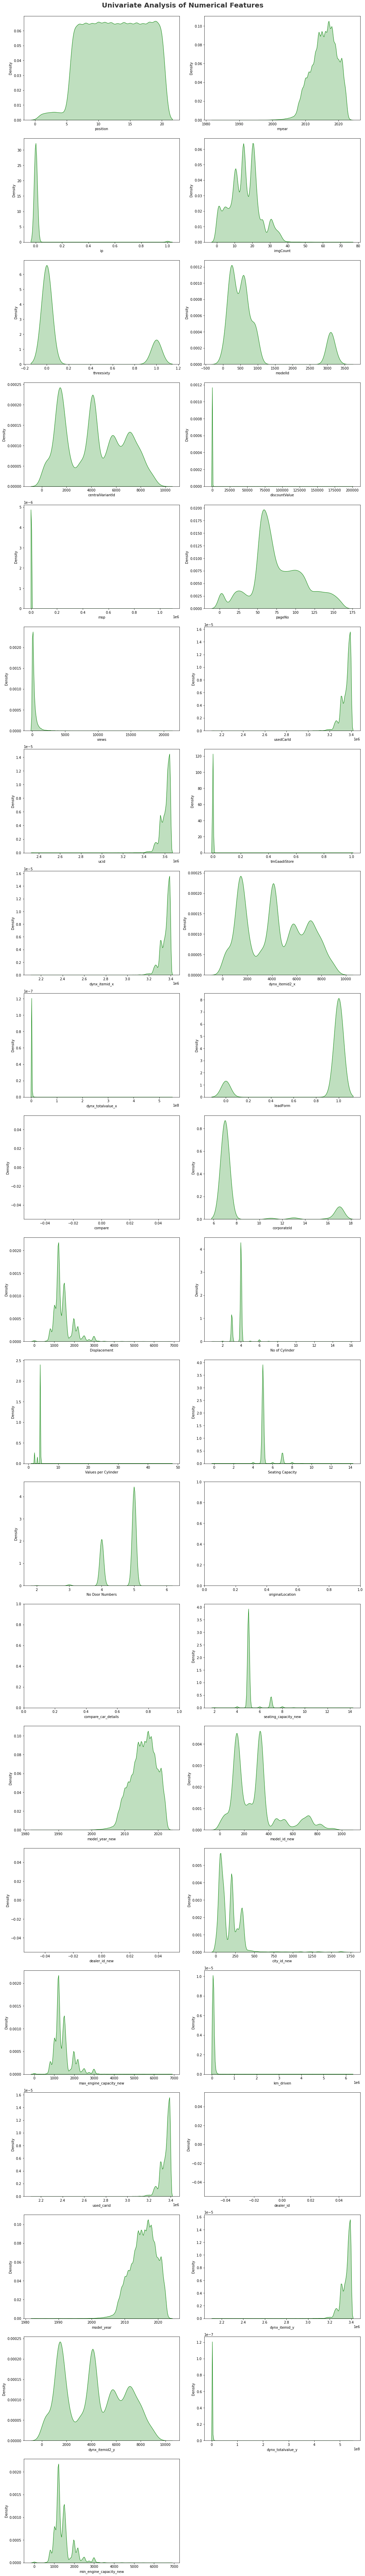

In [13]:
# Calculate the number of rows and columns needed
num_features = len(numeric_features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division

plt.figure(figsize=(15, 5 * num_rows))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(num_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color='Green')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

plt.show()


Report

Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
Outliers in km_driven, enginer, selling_price, and max power.

# Categorical Features


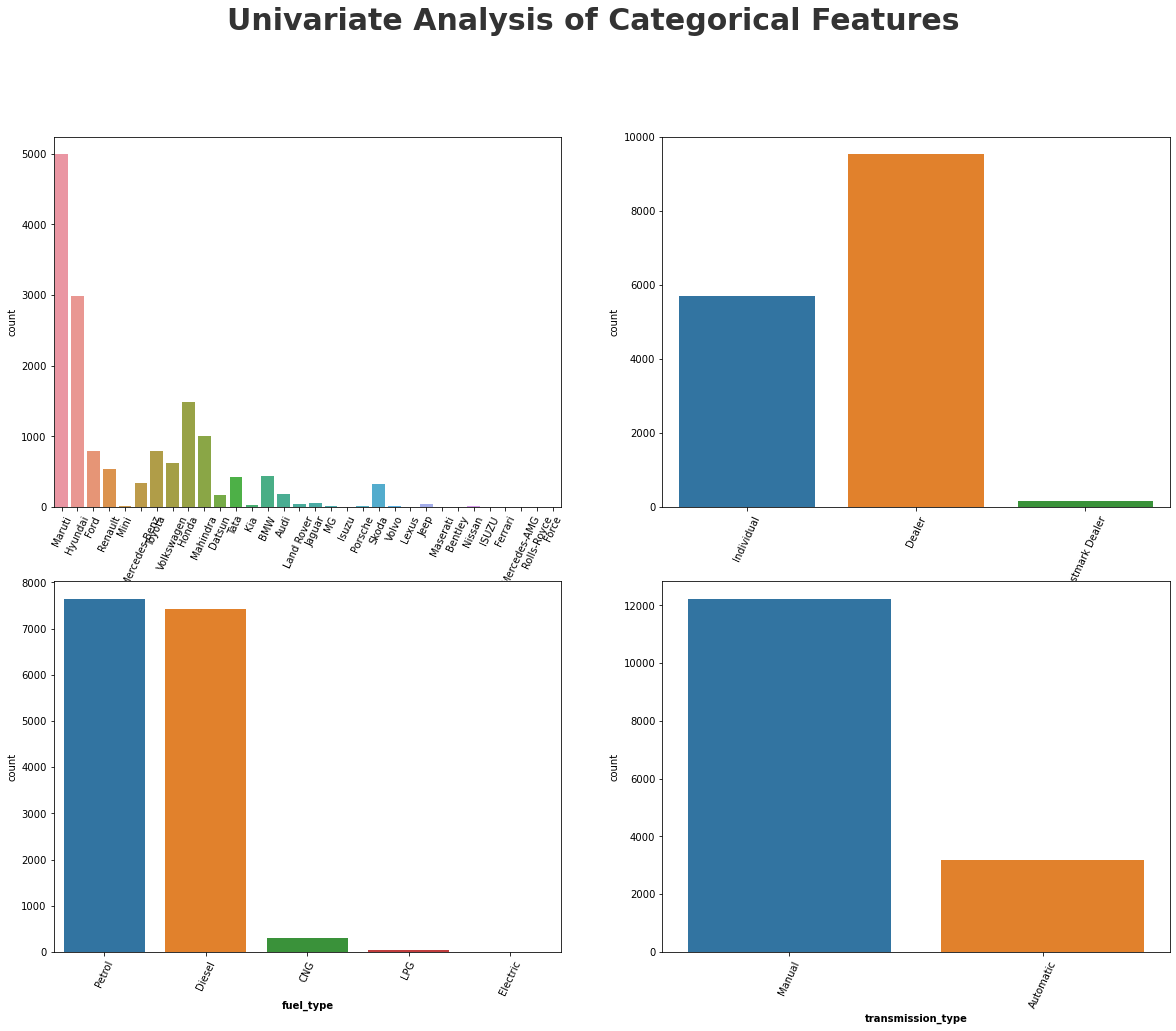

In [72]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i], weight="bold", fontsize=10)
    plt.xticks(rotation=65)

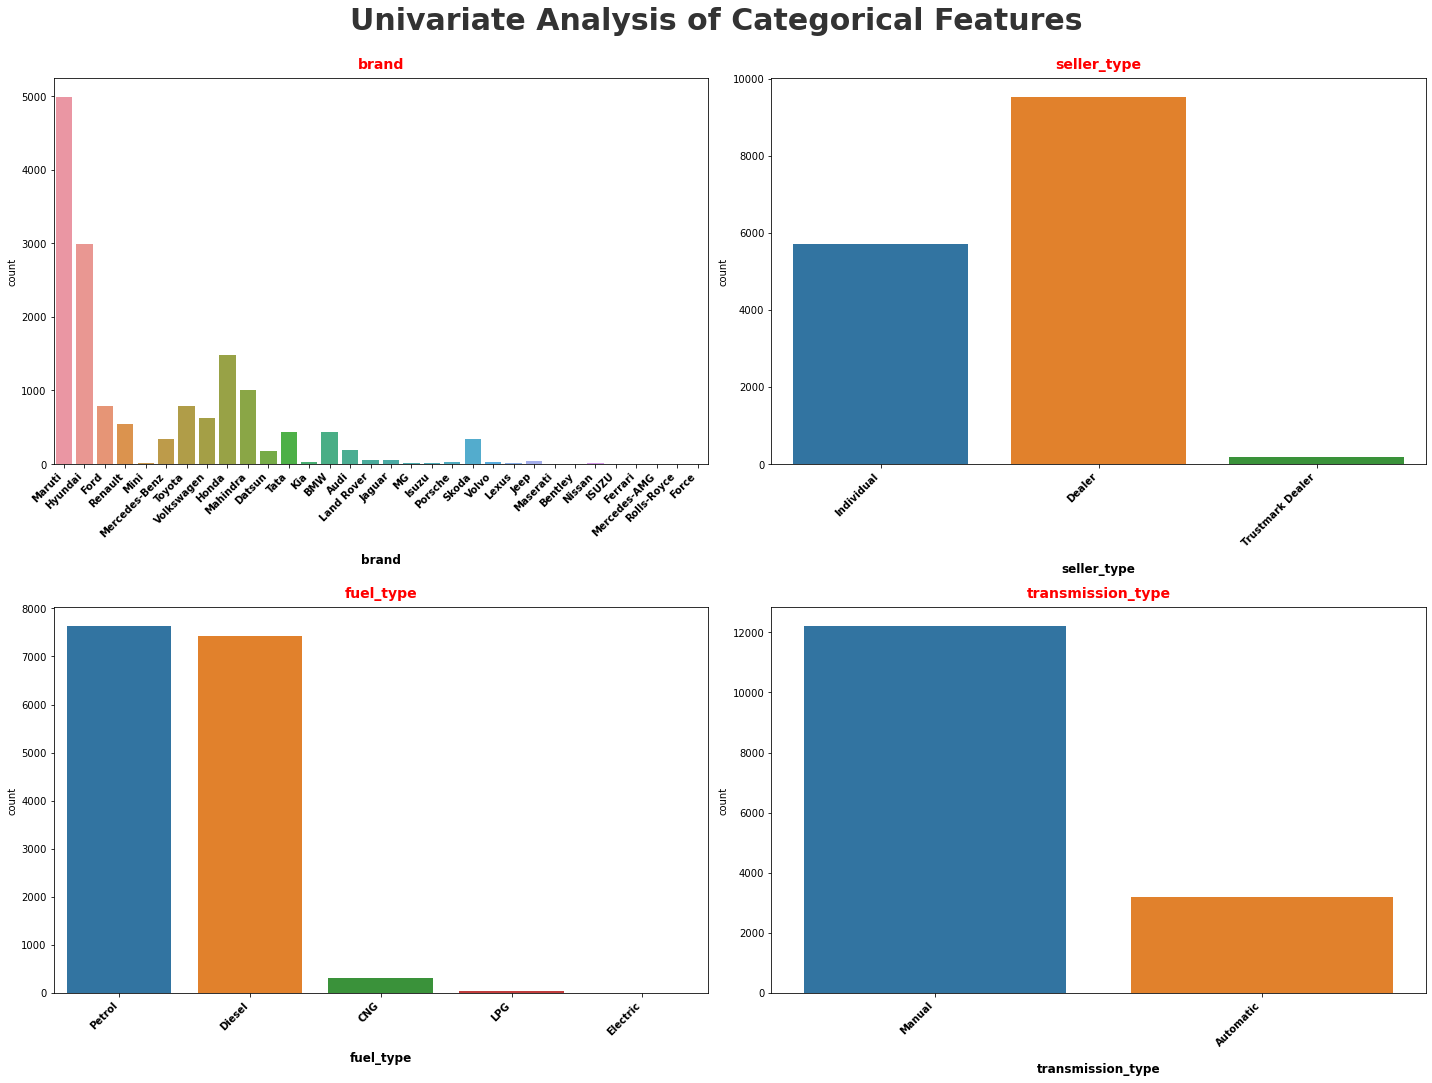

In [114]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and cat1 is a list of categorical columns
cat1 = ['brand', 'seller_type', 'fuel_type', 'transmission_type']

# Set up the figure and title
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=30, fontweight='bold', alpha=0.8, y=1.)

# Loop through the list of categorical columns
for i in range(len(cat1)):
    # Create a subplot for each categorical feature
    plt.subplot(2, 2, i + 1)
    
    # Create a countplot for each feature
    sns.countplot(x=cat1[i], data=df, )
    
    # Customize the x-label for each subplot
    plt.xlabel(cat1[i], weight='bold', fontsize=12, labelpad=15, loc='center')
    
    # Customize the tick labels on the x-axis
    plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
    
    # Customize the title of each subplot
    plt.title(cat1[i], fontsize=14, weight='bold', pad=10, color='Red')

# Adjust layout and show the plot

plt.tight_layout()

plt.show()



# Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

# Check Multicollinearity in Numerical features


In [115]:
df[(list(df.columns)[1:])].corr()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


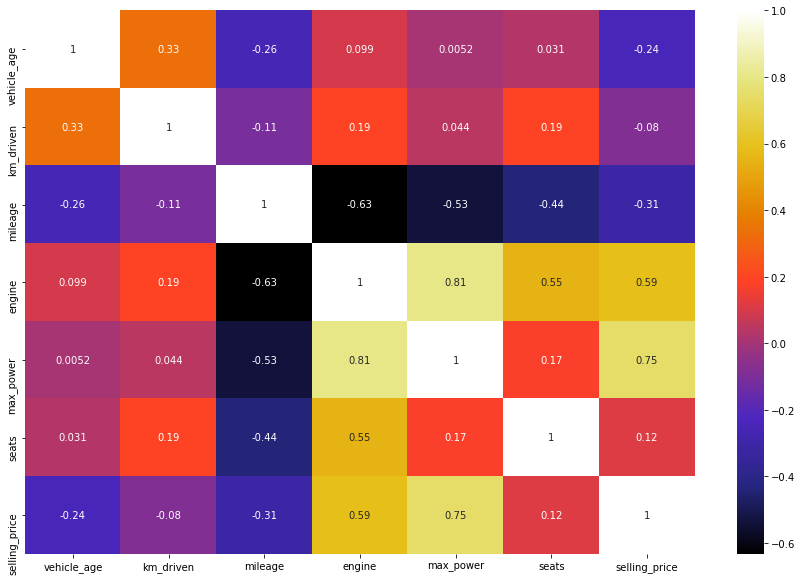

In [116]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

 Report

Our target column ProdTaken has a weak negative correlation on Age and MontlyIncome.

The NumberOfFollowups and Passport columns also have a weak positive correlation with ProdTaken.

The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a strong enough positive correlation.

# Check Multicollinearity for Categorical features
A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

A chi-square statistic is one way to show a relationship between two categorical variables.

Here we test correlation of Categorical columns with Target column i.e Selling Price

In [117]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


Checking Null Values


In [118]:
df.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [119]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


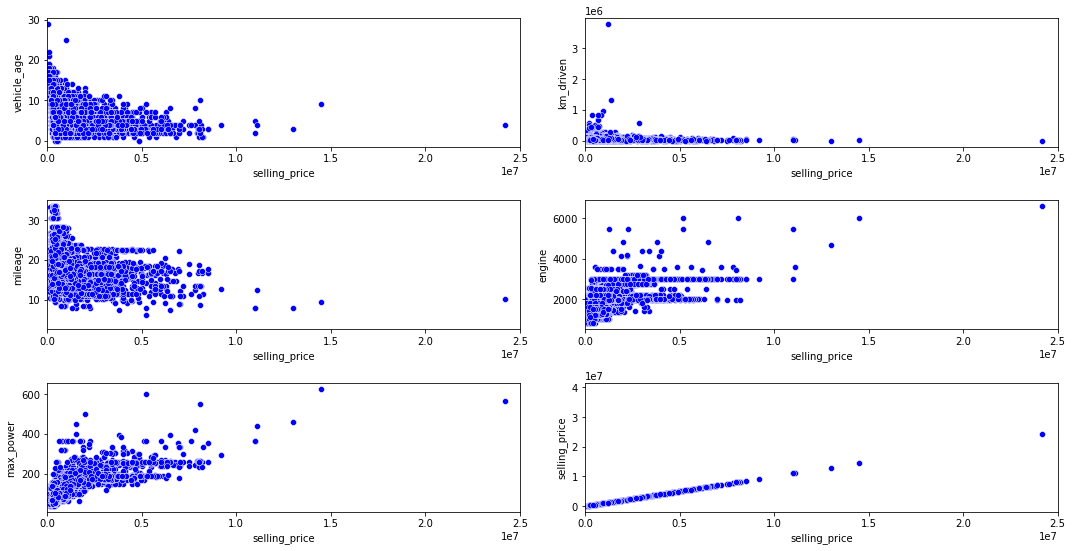

In [120]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continues_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

Initial Analysis Report

Report

Lower Vehicle age has more selling price than Vehicle with more age.

Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.

Kms Driven has negative effect on selling price.

# 4. Visualization


4.1 Visualize the Target Feature


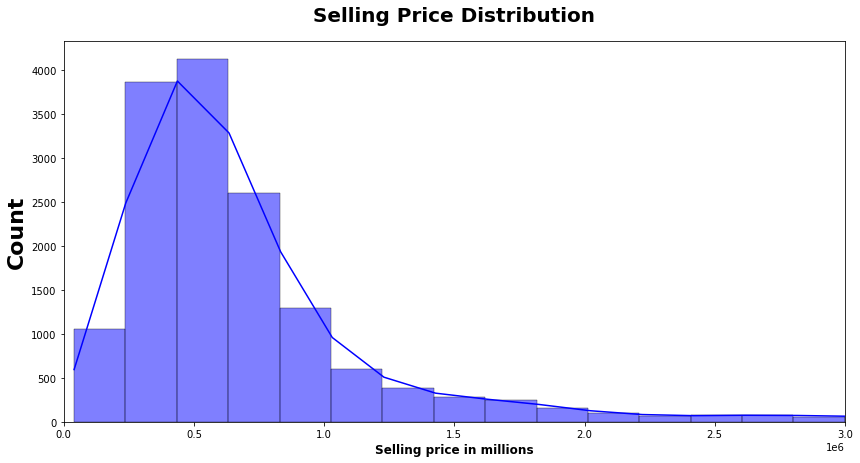

In [121]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=22)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

From the chart it is clear that the Target Variable Skewed


# 4.2 Most Selling car in Used car website?


In [122]:
df.car_name.value_counts()[0:10]


Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

# Most Selling Used Car is Hyundai i20


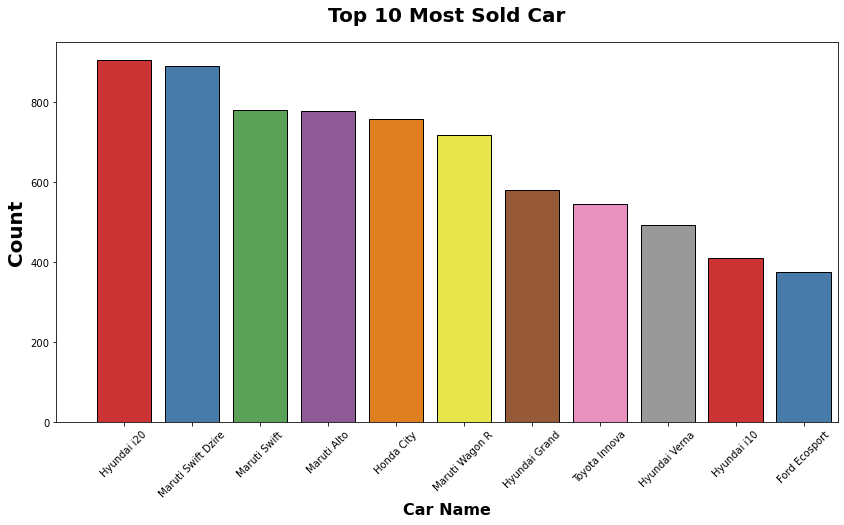

In [123]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

Check mean price of Hyundai i20 which is most sold


In [124]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


Report:

As per the Chart these are top 10 most selling cars in used car website.

Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.

Mean Price of Most Sold Car is 5.4 lakhs.

This Feature has impact on the Target Variable.

# Most selling brand


In [125]:
df.brand.value_counts()[0:10]


Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

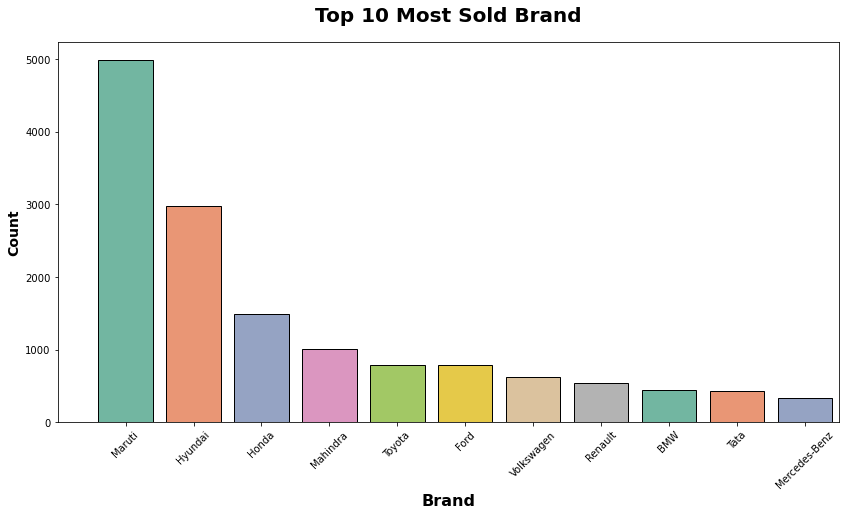

In [126]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

Check the Mean price of Maruti brand which is most sold


In [127]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


Report:

As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.

Following Maruti we have Hyundai and Honda.

Mean Price of Maruti Brand is 4.8 lakhs.

# Costliest Brand and Costliest Car


In [128]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


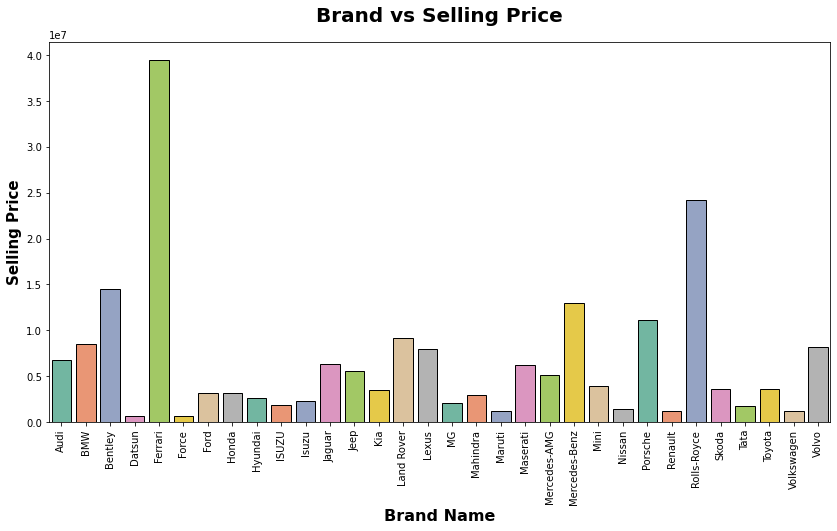

In [129]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Brand vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Report:

Costliest Brand sold is Ferrari at 3.95 Crores.

Second most costliest car Brand is Rolls-Royce as 2.42 Crores.

Brand name has very clear impact on selling price.

# Costliest Car


In [130]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]
car

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


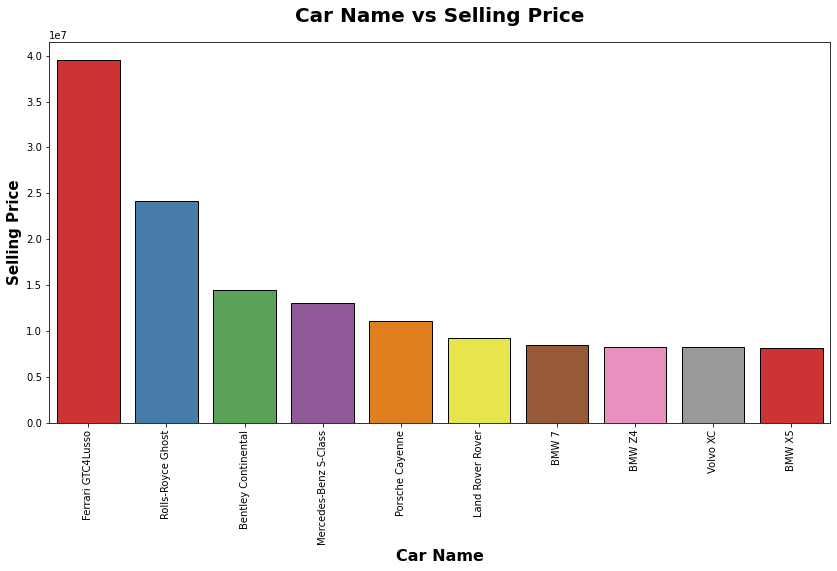

In [131]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

Report

Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.

Ferrari selling price is 3.95 Crs.

Other than Ferrari other car has priced below 1.5cr.

# Most Mileage Brand and Car Name


In [133]:

mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


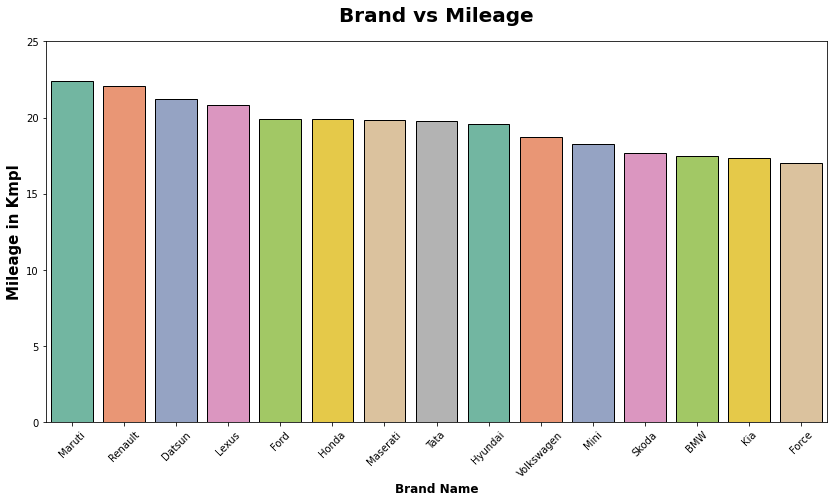

In [134]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

# Car with Highest Mileage


In [135]:
mileage_C= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)
mileage_C.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


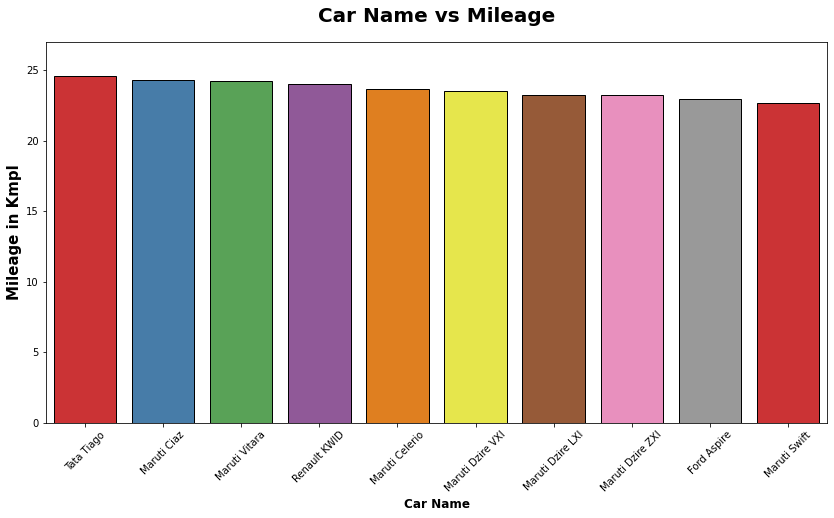

In [136]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_C.index, y=mileage_C.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

# Kilometer driven vs Selling Price


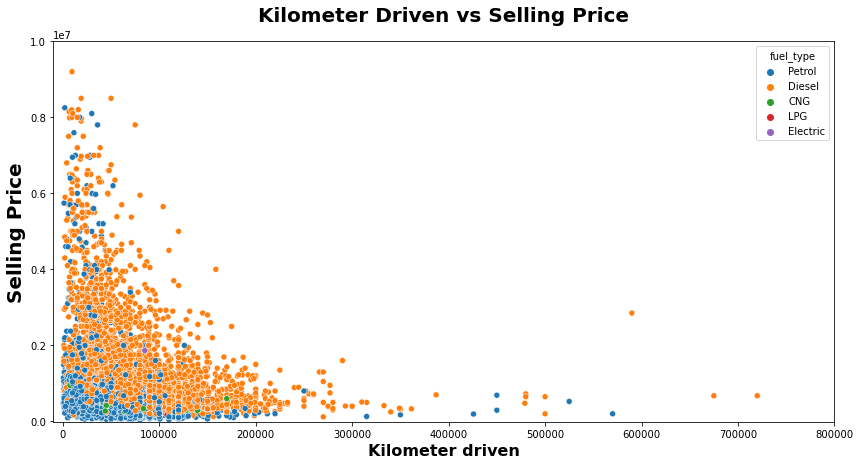

In [137]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

Report

Many Cars were sold with kms between 0 to 20k Kilometers
Low Kms driven cars had more selling price compared to cars which had more kms driven.

# Fuel Type Selling Price


In [138]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500
Diesel,700000
Petrol,460000
CNG,370000
LPG,182500


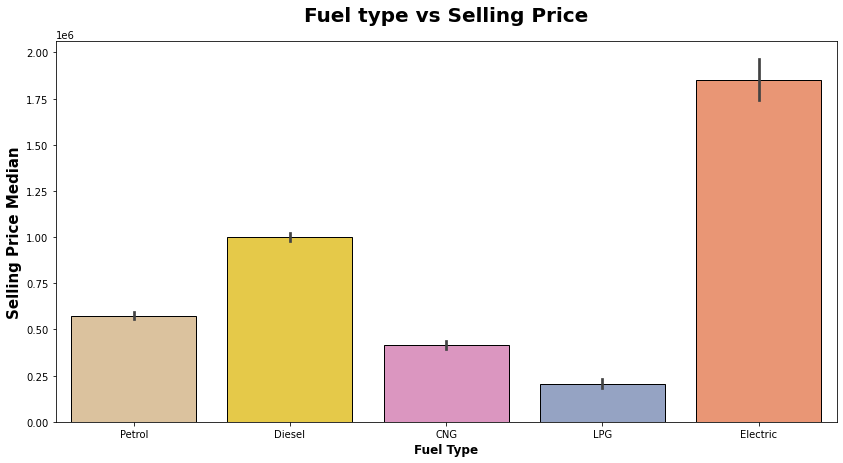

In [139]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df.fuel_type, y=df.selling_price, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price Median", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Report

Electric cars have highers selling average price.

Followed by Diesel and Petrol.

Fuel Type is also important feature for the Target variable.

# Most sold Fuel type


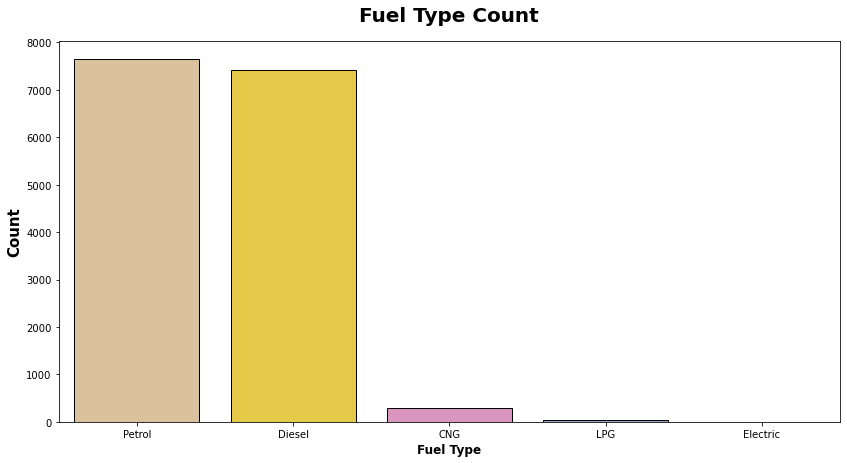

In [140]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

Report

Petrol and Diesel dominate the used car market in the website.

The most sold fuel type Vechicle is Petrol.

Followed by diesel and CNG and least sold is Electric

# Fuel types available and mileage given


In [141]:
# Fuel types available and mileage given
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


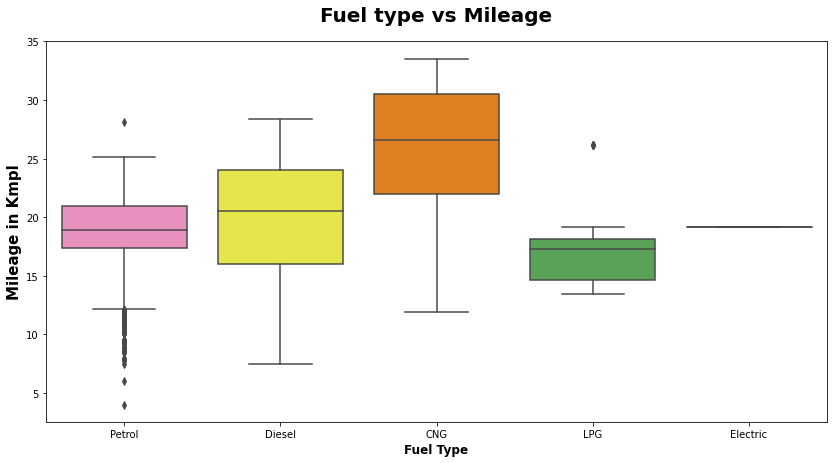

In [142]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

# Mileage vs Selling Price


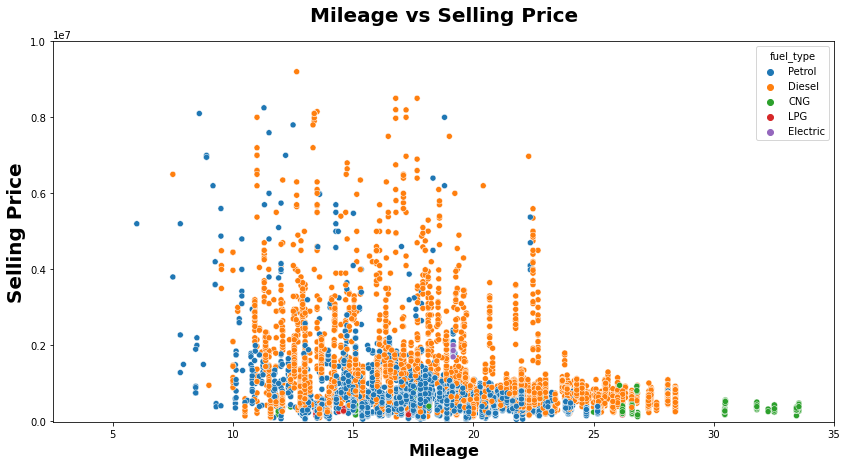

In [143]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

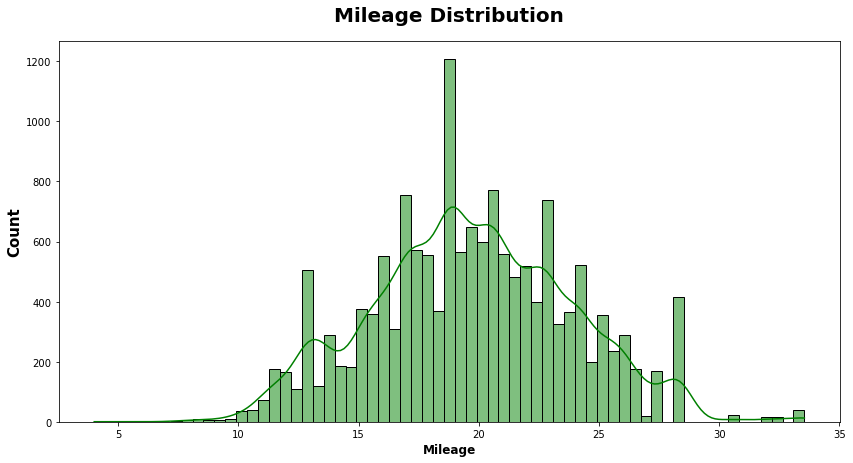

In [144]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

# Vehicle age vs Selling Price


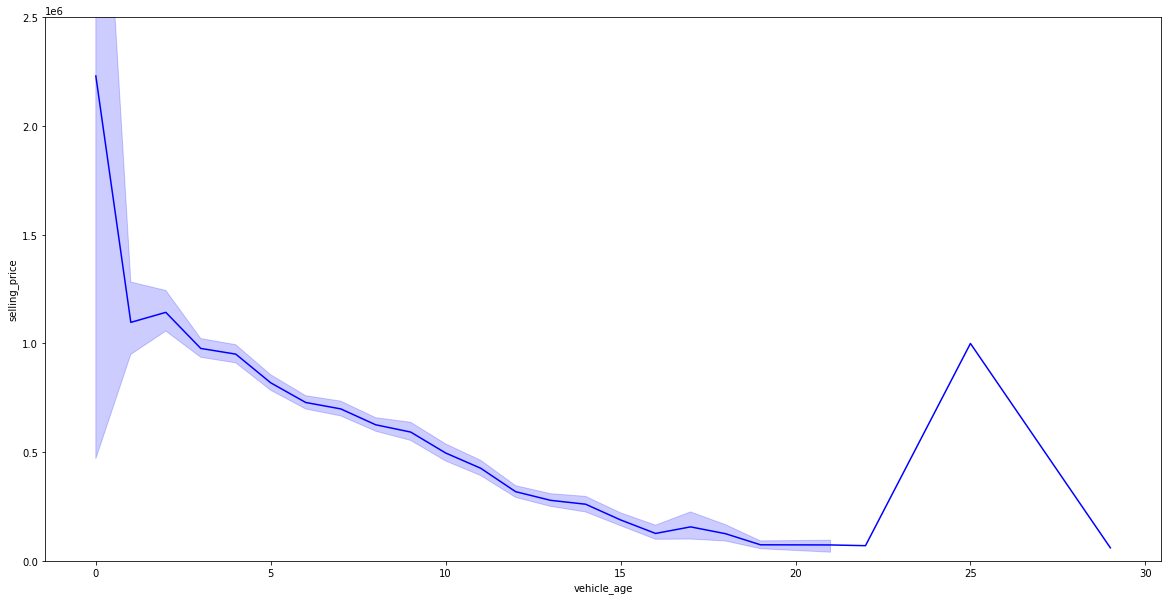

In [145]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

Report

As the Vehicle age increases the price also get reduced.
Vehicle age has Negative impact on selling price

# Vehicle age vs Mileage


In [146]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


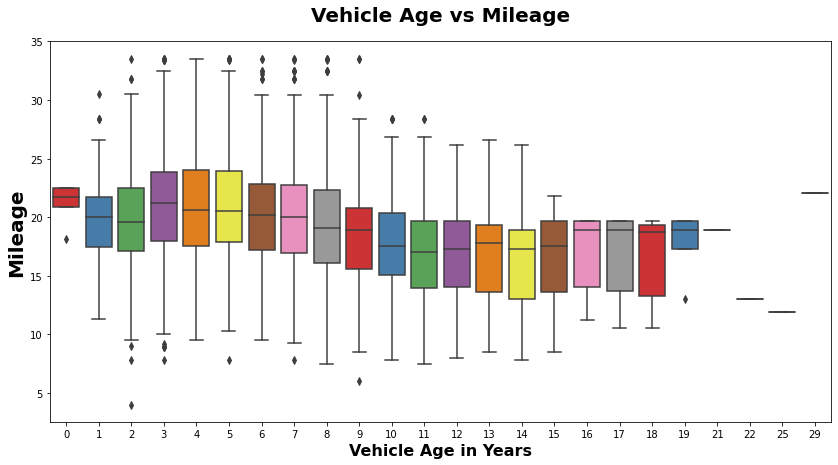

In [147]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

Report

As the Age of vehicle increases the median of mileage drops.

Newer Vehicles have more mileage median older vehicle.

In [148]:

oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17



Report

Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

# Transmission Type


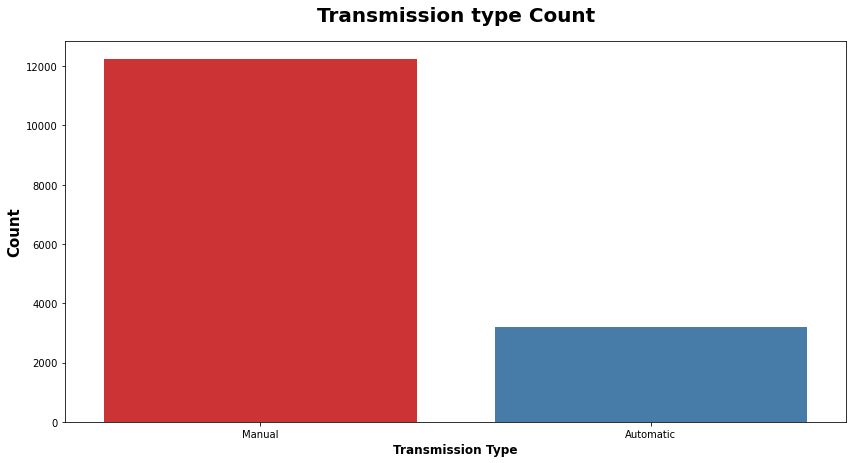

In [149]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

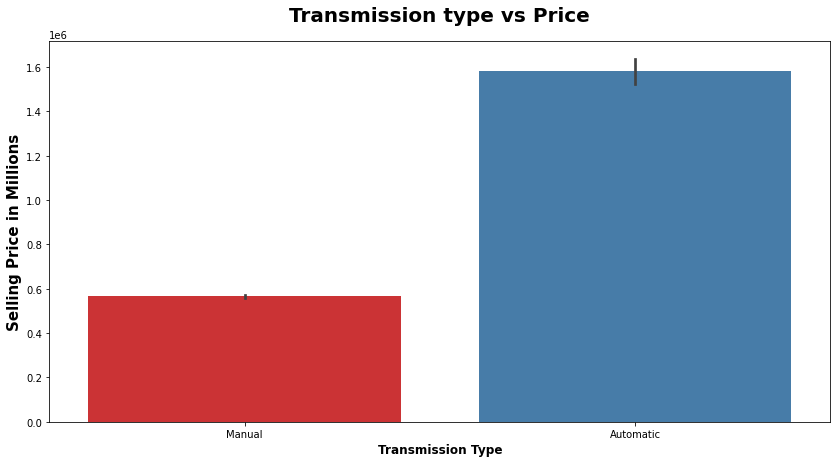

In [150]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

Report

Manual Transmission was found in most of the cars which was sold.

Automatic cars have more selling price than manual cars.

# Seller Type


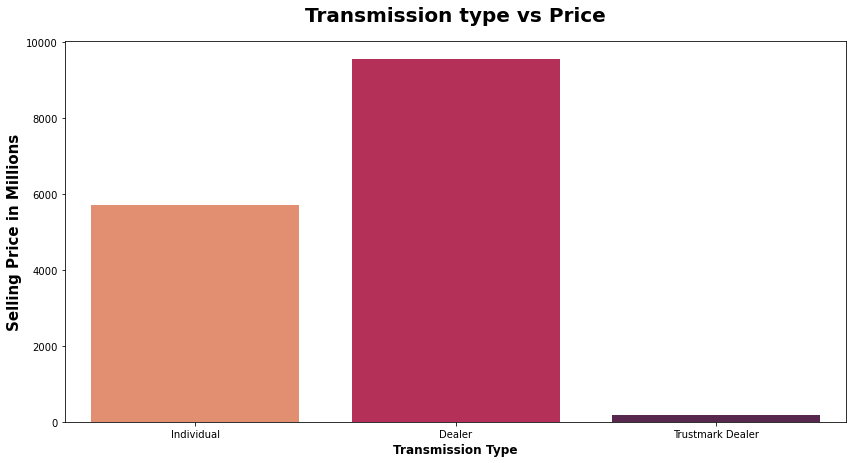

In [151]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

In [152]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000
Trustmark Dealer,540000
Individual,507000


Report:

Dealers have put more ads on used car website.

Dealers have put 9539 ads with median selling price of 5.91 Lakhs.

Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.

Dealers have more median selling price than Individual.

# Final Report:

The datatypes and Column names were right and there was 15411 rows and 13 columns

The selling_price column is the target to predict. i.e Regression Problem.

There are outliers in the km_driven, enginer, selling_price, and max power.

Dealers are the highest sellers of the used cars.

Skewness is found in few of the columns will check it after handling outliers.

Vehicle age has negative impact on the price.

Manual cars are mostly sold and automatic has higher selling average than manual cars.

Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.

We just need less data cleaning for this dataset.